#  Pytorch

## Introduction to Pytorch


In [40]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## A simple function to minimize
 

C:\Users\cbs\AppData\Local\Temp\ipykernel_18604\3125218445.py:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(X, Y, Z, 50, cmap='binary', color="r")


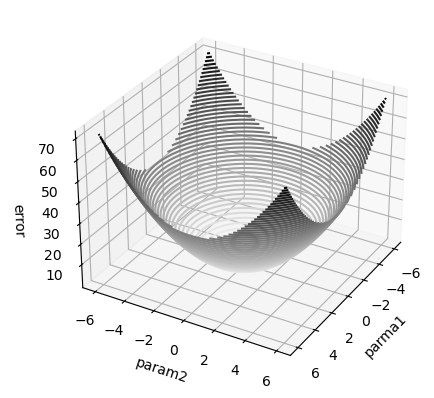

In [41]:
def f(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour(X, Y, Z, 50, cmap='binary', color="r")
ax.set_xlabel('parma1')
ax.set_ylabel('param2')
ax.set_zlabel('error')

ax.view_init(30, 30)

# Simple MNST

In [42]:
from torchvision import datasets, transforms
import torch.nn.functional as F

In [43]:
# Transform each image into tensor and normalized with mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# Define the batch size used each time we go through the dataset
batch_size = 32

# Set the training loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
# Set the testing loader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=transform), batch_size=batch_size, shuffle=True)

### Init the weights

In [44]:
## Init weights
# 784 because there is 784 pixels in each image
# 10 because there is 10 possible outputs : 0,1,2,3,4,5,6,7,8,9
# Each pixel is linked to 10 outputs where each link is a weight to optimize\
# <=> Each class is linked to 784 pixel where each link is a weight to optimize
weights = torch.randn(784, 10, requires_grad=True)

### Compute the accuracy on the test set


In [45]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        #print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))
        #print(batch_idx, data.shape, target.shape)

        outputs = torch.matmul(data, weights)
        softmax = F.softmax(outputs, dim=1)
        pred = softmax.argmax(dim=1, keepdim=True)
        n_correct = pred.eq(target.view_as(pred)).sum().item()
        correct += n_correct

    acc = correct / test_size
    print(" Accuracy on test set", acc)
    return

test(weights, test_loader)

 Accuracy on test set 0.0519


## train the model 

In [46]:
it = 0
for batch_idx, (data, targets) in enumerate(train_loader):
    # Be sure to start the loop with zeros grad
    if weights.grad is not None:
        weights.grad.zero_()
    
    data = data.view((-1, 28*28))
    #print("batch_idx: {}, data.shape: {}, target.shape: {}".format(batch_idx, data.shape, targets.shape))
    outputs = torch.matmul(data, weights)
    #print("outputs.shape: {}".format(outputs.shape))

    log_softmax = F.log_softmax(outputs, dim=1)
    #print("Log softmax: {}".format(log_softmax.shape))

    #print((-log_softmax[0][targets[0]] + -log_softmax[1][targets[1]] )  / 2 )
    #print(-log_softmax[0][targets[0]], targets[0])
    
    loss = F.nll_loss(log_softmax, targets)
    print("\rLoss shape: {}".format(loss), end="")
    
    # Compute the gradients for each variables
    loss.backward()
    
    with torch.no_grad():
        weights -= 0.1*weights.grad
        
    it += 1
    if it % 100 == 0:
        test(weights, test_loader)
        
    if it > 5000:
        break

Loss shape: 2.0458245277404785 Accuracy on test set 0.6741
Loss shape: 3.78626608848571785 Accuracy on test set 0.7636
Loss shape: 4.7839584350585944 Accuracy on test set 0.7908
Loss shape: 2.65449476242065436 Accuracy on test set 0.818
Loss shape: 1.46774840354919436 Accuracy on test set 0.8299
Loss shape: 2.487618684768676872 Accuracy on test set 0.843
Loss shape: 0.664694964885711746 Accuracy on test set 0.8446
Loss shape: 0.51844489574432377 Accuracy on test set 0.8494
Loss shape: 1.45456826686859135 Accuracy on test set 0.8522
Loss shape: 4.19395637512207951 Accuracy on test set 0.8604
Loss shape: 1.178819417953491293 Accuracy on test set 0.8572
Loss shape: 0.663889884948730554 Accuracy on test set 0.8575
Loss shape: 5.0438003540039068312 Accuracy on test set 0.8679
Loss shape: 1.33588945865631137 Accuracy on test set 0.8673
Loss shape: 4.006794929504394565 Accuracy on test set 0.8765
Loss shape: 2.251512527465820376 Accuracy on test set 0.8715
Loss shape: 2.026227235794067465 Acc

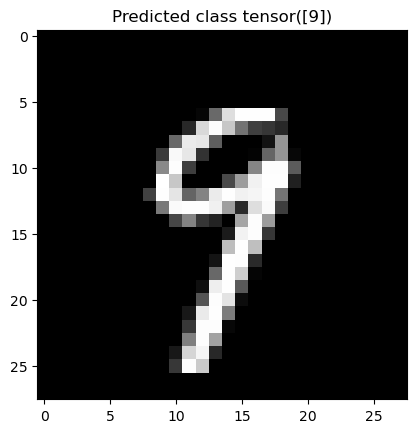

In [47]:
import matplotlib.pyplot as plt

batch_idx, (data, target) = next(enumerate(test_loader))
data = data.view((-1, 28*28))

outputs = torch.matmul(data, weights)
softmax = F.softmax(outputs, dim=1)
pred = softmax.argmax(dim=1, keepdim=True)

plt.imshow(data[0].view(28, 28), cmap="gray")
plt.title("Predicted class {}".format(pred[0]))
plt.show()

## 